In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
        'weight' : 'normal'}

matplotlib.rc('font', **font)
from afrc import AnalyticalFRC
import protfasta


LENGTHS = [10,20,30,40,50,100,120, 140,180,200,250,300,350,400,450,500]

### Warning
The cell below takes a hot second to execute (~5-10 min depending on your disk speed(

In [2]:
LENGTHS_r = {}
LENGTHS_RMSE = {}

for AA in ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']:
    for L in LENGTHS:
        intscal = np.loadtxt(f'data/is/frc_intscal_{AA}_{L}.csv')
        seq = protfasta.read_fasta(f'data/sequences/frc_seq_{AA}_{L}.fasta',return_list=True)[0][1]
        
        if L not in LENGTHS_r:
            LENGTHS_r[L] = []
            LENGTHS_RMSE[L] = []
            
        LENGTHS_r[L].append(np.corrcoef(intscal[1:], AnalyticalFRC(seq).get_internal_scaling().transpose()[1])[0][1])
        rmse = np.sqrt(np.mean(np.power(intscal[1:]- AnalyticalFRC(seq).get_internal_scaling().transpose()[1],2)))
        LENGTHS_RMSE[L].append(rmse)
        
                             

In [4]:
np.mean(LENGTHS_r[10])

0.9992767715676981

meta NOT subset; don't know how to subset; dropped


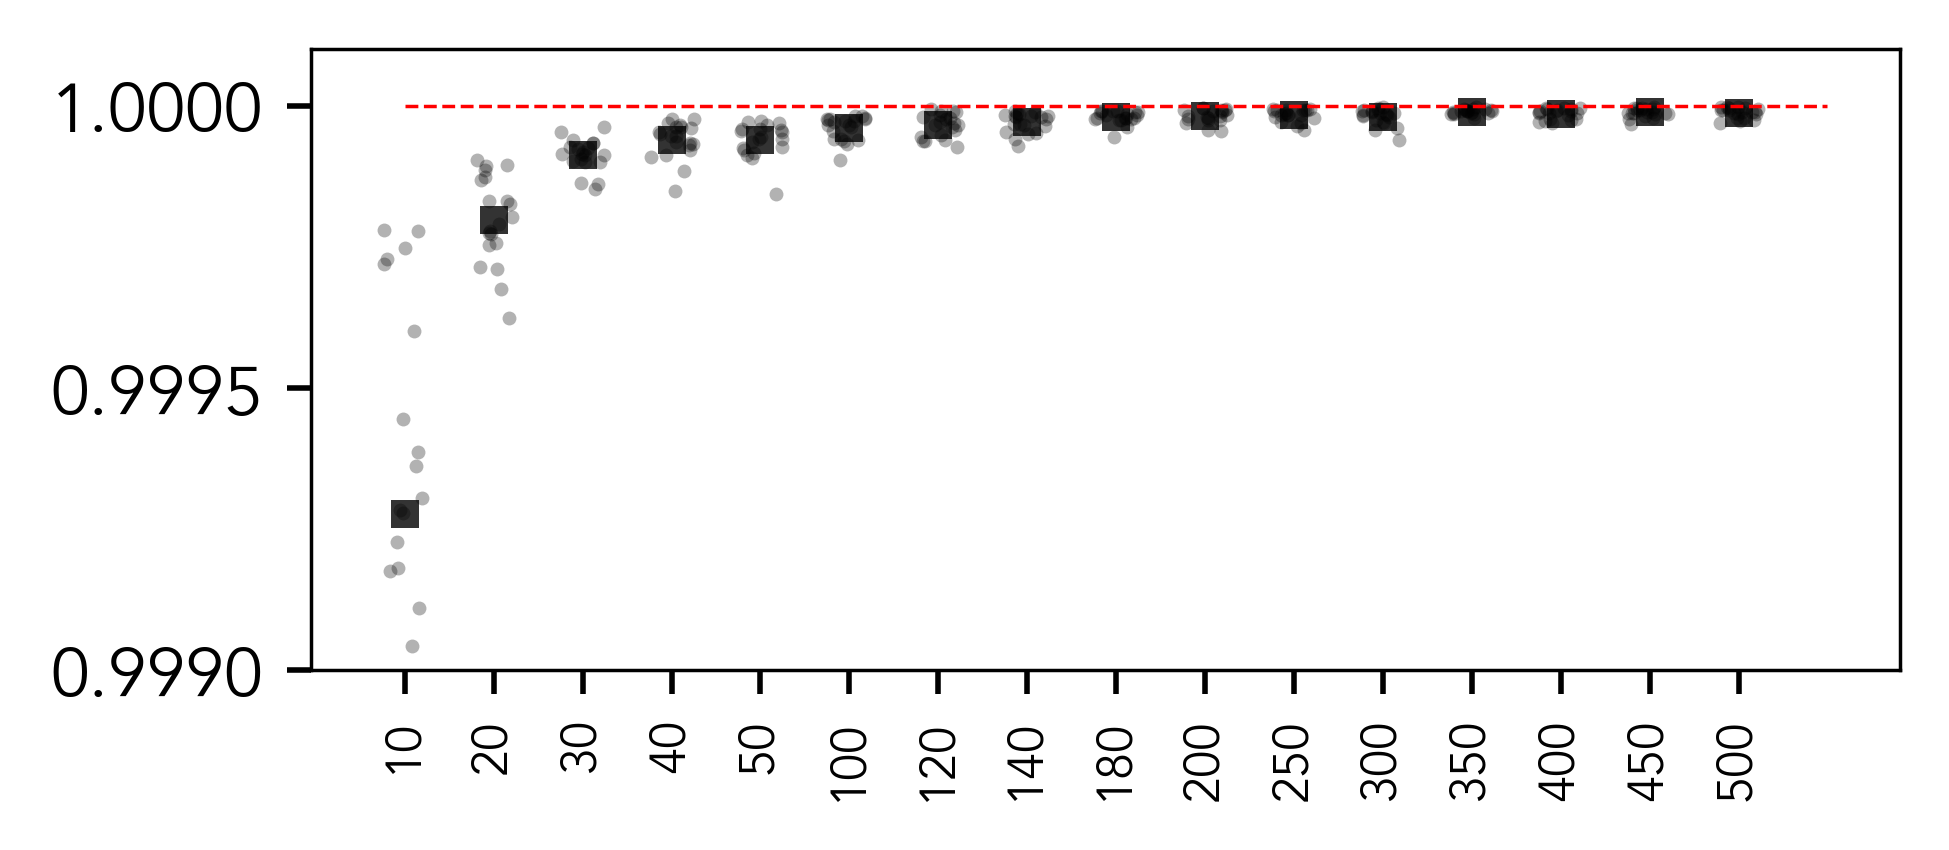

In [5]:
fig = figure(num=None, figsize=(4., 1.8), dpi=250, facecolor='w', edgecolor='k')

for idx, L in enumerate(LENGTHS):
    
    n_vals = len(LENGTHS_r[L])
    
    jitter = 0.5*(np.random.rand(n_vals)-0.5)
    plt.plot(jitter+idx, LENGTHS_r[L],'.k',ms=4, alpha=0.3, mew=0)
    plt.plot(idx, np.mean(LENGTHS_r[L]),'sk',ms=4, alpha=0.8, mew=0)
    
plt.xticks(np.arange(0,len(LENGTHS)), LENGTHS,fontsize=7, rotation=90)    
plt.plot([0,len(LENGTHS)],[1,1],'--r', linewidth=0.5)
plt.ylim([0.999,1.0001])
plt.tight_layout()
plt.savefig('R_all.pdf')


    

In [6]:
total_count = 20*16
overall_average = np.mean([np.mean(LENGTHS_r[x]) for x in LENGTHS_r])
print(overall_average)
number_above_1_ANG = np.sum(np.array([LENGTHS_r[x] for x in LENGTHS_r]) > 0.9999)
print((number_above_1_ANG)/total_count)

0.9999150727224696
0.859375


meta NOT subset; don't know how to subset; dropped


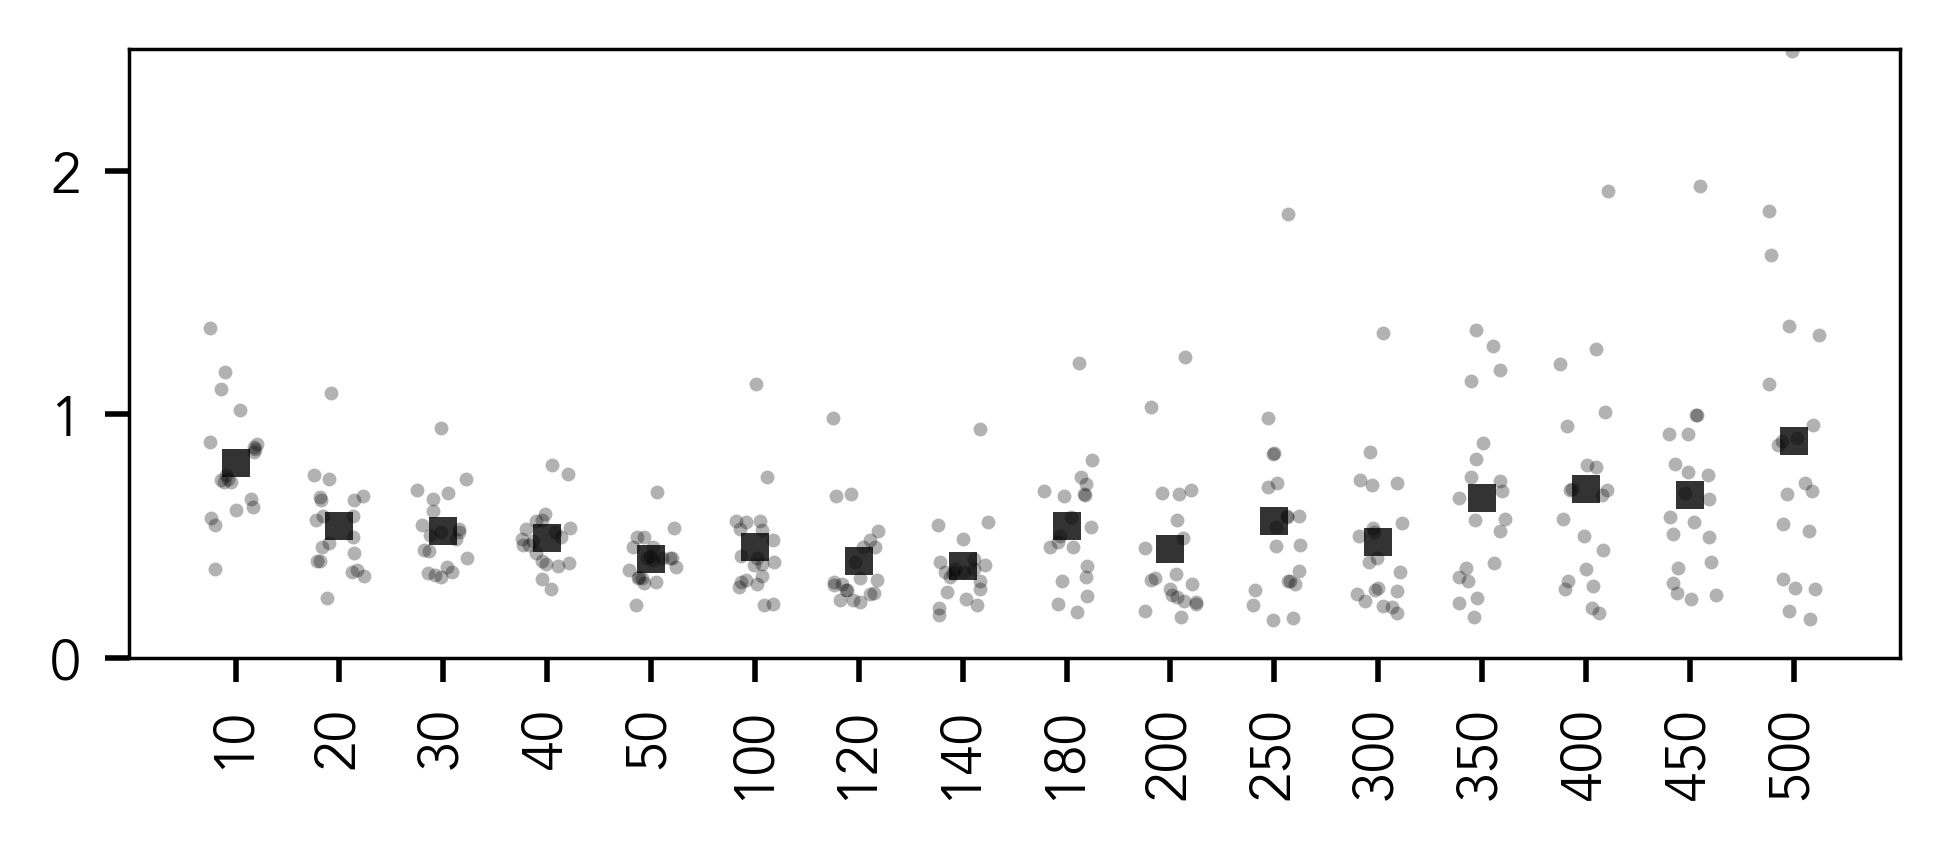

In [7]:
fig = figure(num=None, figsize=(4., 1.8), dpi=250, facecolor='w', edgecolor='k')

for idx, L in enumerate(LENGTHS):
    
    n_vals = len(LENGTHS_RMSE[L])
    
    jitter = 0.5*(np.random.rand(n_vals)-0.5)
    plt.plot(jitter+idx, LENGTHS_RMSE[L],'.k',ms=4, alpha=0.3, mew=0)
    plt.plot(idx, np.mean(LENGTHS_RMSE[L]),'sk',ms=4, alpha=0.8, mew=0)
    
    
plt.xticks(np.arange(0,len(LENGTHS)), LENGTHS,fontsize=8, rotation=90)    
plt.yticks(fontsize=8)
plt.ylim([0,2.5])
plt.tight_layout()
plt.savefig('RMSE_all.pdf')
    

In [8]:
total_count = 20*16
overall_average = np.mean([np.mean(LENGTHS_RMSE[x]) for x in LENGTHS_RMSE])
print(overall_average)
number_above_1_ANG = np.sum(np.array([LENGTHS_RMSE[x] for x in LENGTHS_RMSE]) > 1)
print((total_count - number_above_1_ANG)/total_count)

0.5578486572724586
0.91875


In [9]:
def plot_is(AA,L):
    intscal = np.loadtxt(f'data/is/frc_intscal_{AA}_{L}.csv')
    seq = protfasta.read_fasta(f'data/sequences/frc_seq_{AA}_{L}.fasta',return_list=True)[0][1]
    plt.plot(np.arange(1,len(seq)),intscal[1:],'g',linewidth=2,alpha=0.4)
    plt.plot(np.arange(1,len(seq)),AnalyticalFRC(seq).get_internal_scaling().transpose()[1],'k',linewidth=0.5,alpha=0.8)
    
    

meta NOT subset; don't know how to subset; dropped


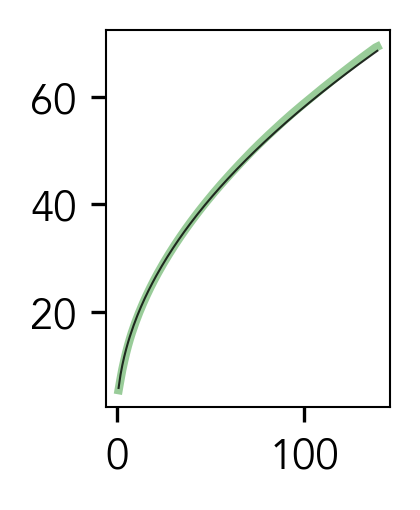

In [10]:
fig = figure(num=None, figsize=(1.5, 1.8), dpi=150, facecolor='w', edgecolor='k')

AA='K'
L=140
plot_is(AA,L)
plt.tight_layout()
plt.savefig('IS_demo.pdf')


